Import and plot data from SpectraWiz
in v2: you can copy and paste the filepath, windows or mac, along with the base filename and and suffix, and python will create the appropriate file path and load data.

This program compares with calibration data from ocean optics to make sure that the USB spectrometer is calibrated. Will need a correctional factor (see below) of +1.70 nm.

Next improvements I would like:
- to be able to conveniently load multiple files simultaneously and compare them.
- create a user-modify area that performs functions such as normalizing... ultimately a gui with widgets (sliders, buttons, etc) would be nice for this!  Tkinter  https://www.youtube.com/watch?v=RJB1Ek2Ko_Y
possibly useful: 
https://www.youtube.com/watch?v=Iqjy9UqKKuo&list=PLQVvvaa0QuDc-3szzjeP6N6b0aDrrKyL-
Data Analysis with Python for Excel Users (pandas): https://www.youtube.com/watch?v=FXhED53VZ50
Data Science with Python Pandas by Athena Kan: https://www.youtube.com/watch?v=POe1cufDWFs


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import os.path
from savefig import save

In [2]:
#### begin user-modified area: ####
# filepath = r"C:\Users\Student\Google Drive\@research\@lab equipment\@optics\filters"
filepath = r"..\..\2017_06_13 tisappj"
dir_name = os.path.normpath(filepath)
base_filename= "05 int time 2ms"
filename_suffix = "SSM"
#### end user-modified area ####

# concat full file path:
filepath = os.path.join(dir_name, base_filename + "." + filename_suffix)

# import data:
data = np.genfromtxt(filepath,
                     skip_header=2,
                     delimiter='  ')
wavelength = data[:,0]
amplitude = data[:,1]

In [3]:
# data

In [4]:
xaxis_label = 'wavelength (nm)'
yaxis_label = 'amplitude (a.u.)'
titleName = time.strftime("%c")+'  '+filepath+'\ntransmission spectrum'
titleName

'Thu Jun 22 08:38:01 2017  ..\\..\\2017_06_13 tisappj\\05 int time 2ms.SSM\ntransmission spectrum'

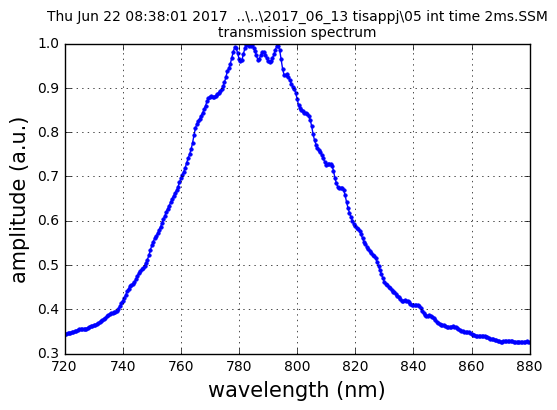

In [5]:
amplNORM = amplitude/np.max(amplitude)

plt.figure(figsize=None, dpi=400, facecolor=None, edgecolor=None, linewidth=0.0, frameon=None, subplotpars=None)
# plt.semilogy(wavelength,amplitude,'.-',markersize=5)
plt.plot(wavelength,amplNORM,'.-',markersize=5)
plt.xlabel(xaxis_label,fontsize=15)
plt.ylabel(yaxis_label,fontsize=15)
plt.grid()
plt.title(titleName,fontsize=10)
plt.xlim([720,880])
# plt.ylim([.1,100])
# plt.tight_layout()
plt.show()
# plt.savefig(time.strftime("%Y_%m_%d_%Hh%Mm_")+'p-probe.png')
# save("signal", ext="png", close=False, verbose=True)

In [6]:
# ## plot as a function of energy (eV)
# plt.figure(figsize=None, dpi=400, facecolor=None, edgecolor=None, linewidth=0.0, frameon=None, subplotpars=None)

# plt.plot(1239.84/wavelength,amplitude,'.-',markersize=5)
# plt.xlabel('Energy (eV)',fontsize=15)
# plt.ylabel(yaxis_label,fontsize=15)
# plt.grid()
# plt.title(titleName,fontsize=15)
# # plt.xlim([760,840])
# plt.ylim([.1,100])
# plt.show()
# # plt.savefig(time.strftime("%Y_%m_%d_%Hh%Mm_")+'p-probe.png')

In [7]:
x_nm = wavelength
y_amplNORM = amplNORM


from scipy import interpolate
import scipy.optimize

def Gaussian(x_val,a, b, c, y_0):
    return (a * np.exp(-(x_val - b)**2 / (2 * c**2)) + y_0)
a_g   = 1           # a = height
b_g   = 800         # b = center position     915
c_g =  30           # c = FWHM / 2.35482
y_0_g = 0           # y_0 = y val of asymptote

#best fit lines (guesses help the process)
p_guess_Gauss = [a_g, b_g, c_g, y_0_g]
peak_Gauss, pcov_Gauss = scipy.optimize.curve_fit(Gaussian, wavelength[:], y_amplNORM[:], p0 = p_guess_Gauss)

p_err_Gauss = np.sqrt(np.diag(pcov_Gauss))

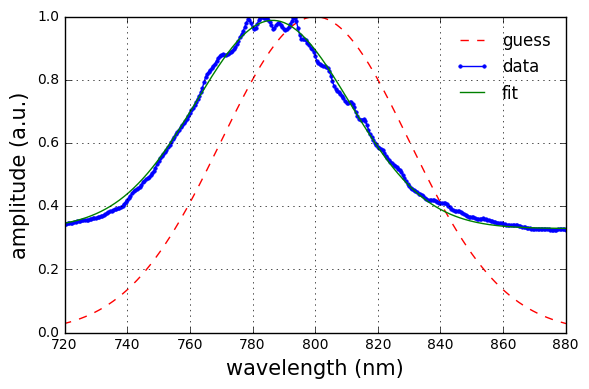

In [8]:
plt.figure(15)
plt.clf()
plt.plot(x_nm, Gaussian(x_nm, *p_guess_Gauss), 'r--',label='guess')
plt.plot(x_nm,y_amplNORM,'.-',markersize=5,label='data')
plt.plot(x_nm, Gaussian(x_nm, *peak_Gauss), 'g',label='fit')
# plt.tight_layout() 
plt.xlim([720,880])
plt.legend(frameon=False,loc='best') 
plt.grid()
# plt.xlabel(xaxis_label_fs,fontsize=15)
# plt.ylabel(yaxis_label,fontsize=15)
# plt.xlim([910,980])
plt.xlabel(xaxis_label,fontsize=15)
plt.ylabel(yaxis_label,fontsize=15)
plt.tight_layout() 
plt.show()

In [9]:
print("Our fitted values:")
print("Height: %.9f"%(peak_Gauss[0]),"a.u.")
print("Center: x =%.5f"%(peak_Gauss[1]),"nm")
print("FWHM : %.5f"%(peak_Gauss[2]*2.35482),"nm")
print("Flatline: y =%.9f"%(peak_Gauss[3]),"a.u.")
print()

Our fitted values:
Height: 0.658964015 a.u.
Center: x =786.42452 nm
FWHM : 57.72277 nm
Flatline: y =0.329302486 a.u.

